In [96]:
import pandas as pd
import numpy as np
import time
import re
import seaborn as sns

Get a place type frequency matrix for the stations:

In [97]:
label_matrix = pd.read_csv("Places_near_stations_type_count_matrix_all.csv", index_col = 0)
label_matrix

,StationName,mosque,point_of_interest,beauty_salon,embassy,car_dealer,hardware_store,liquor_store,bakery,florist,...,transit_station,tourist_attraction,supermarket,art_gallery,lodging,fire_station,roofing_contractor,hospital,car_repair,convenience_store
0,Ballston Metro / Stuart St & 9th St N,0,58,0,0,0,0,0,0,0,...,1,0,0,0,4,0,0,0,0,0
1,Fairfax Dr & N Randolph St,0,58,0,0,0,0,1,0,0,...,1,0,0,0,2,0,0,0,0,1
2,Jefferson Memorial,0,13,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
3,Good Hope Rd & 14th St SE,0,58,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,Glebe Rd & 11th St N,0,58,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,White Oak Transit Center,0,59,2,0,0,0,1,0,0,...,2,0,0,0,0,0,0,0,0,2
591,Wilson Blvd. & N. Vermont St.,0,58,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
592,Minnesota Ave & R St SE,0,37,0,0,0,0,0,0,0,...,6,0,0,0,1,0,0,0,0,0
593,Vy Reston Heights,0,59,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


**Standardizing data**:
1. Standardize by row;
2. Add "total number of tags" as a separate feature

In [98]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
tag_sum = label_matrix.sum(axis=1)
tag_sum_normalized = StandardScaler().fit_transform(np.array(tag_sum).reshape(-1, 1))
x = label_matrix[label_matrix.columns[label_matrix.columns!='StationName']].values
x = pd.DataFrame(Normalizer().fit_transform(x))
x.columns = label_matrix.columns[label_matrix.columns!='StationName']
#x['tag_sum'] = tag_sum_normalized
x = x.values

y = label_matrix['StationName'].values

C:\Users\rosen_000\Anaconda3b\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\rosen_000\Anaconda3b\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Unsupervised learning task: clustering station based on nearby place type

K-means clustering

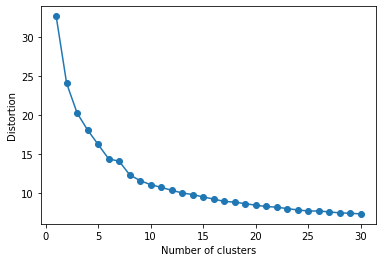

In [99]:
from sklearn.cluster import KMeans
distortions = []
for i in range(1, 31):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(1, 31), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [100]:
from sklearn.cluster import KMeans
km = KMeans(
        n_clusters=10, init='random',
        n_init=10, max_iter=1000,
        tol=1e-05, random_state=0
)
cluster_labels2 = km.fit_predict(x)

PCA:

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(principalComponents, columns=('PC1', 'PC2','PC3','PC4','PC5'))
principalDf['KMcluster'] = cluster_labels2.astype(object)
pca.explained_variance_ratio_

array([0.34928564, 0.1813255 , 0.09527553, 0.07520893, 0.04848564])

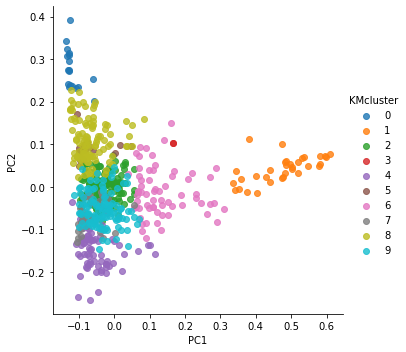

In [26]:
sns.lmplot( x='PC1', y='PC2', data=principalDf, fit_reg=False, hue='KMcluster', legend=True)

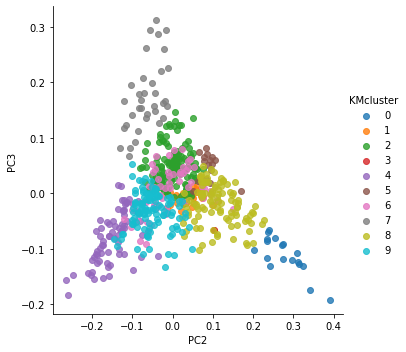

In [27]:
sns.lmplot( x='PC2', y='PC3', data=principalDf, fit_reg=False, hue='KMcluster', legend=True)

**Kernel PCA:**
A polynomial kernal is used because it gives the largest dominant eigenvalue.

In [28]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=5, kernel = 'poly')
kprincipalComponents = kpca.fit_transform(x)
kprincipalDf = pd.DataFrame(kprincipalComponents, columns=('PC1', 'PC2','PC3','PC4','PC5'))
kprincipalDf['KMcluster'] = cluster_labels2.astype(object)

In [29]:
kpca.lambdas_

array([0.34456392, 0.17905841, 0.09409653, 0.0740639 , 0.04775732])

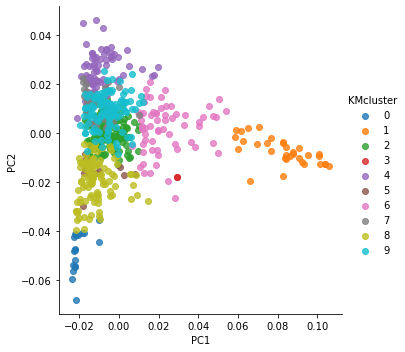

In [30]:
sns.lmplot( x='PC1', y='PC2', data=kprincipalDf, fit_reg=False, hue='KMcluster', legend=True)

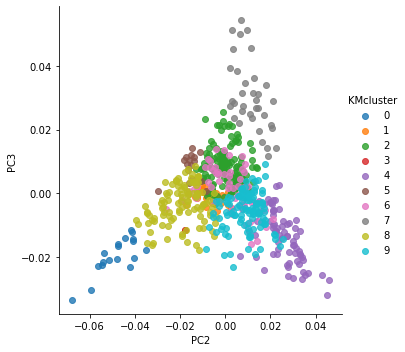

In [47]:
sns.lmplot( x='PC2', y='PC3', data=kprincipalDf, fit_reg=False, hue='KMcluster', legend=True)

The polynomial kernal PCA slightly enlarged PC2 and PC3 features, but overall the result looks highly similar to that of linear PCA. 

Do the clusters have interpretable meanings? $\Rightarrow$ time for a sanity check.

In [108]:
count_per_category = pd.read_csv("../Project/count_per_category.csv", index_col=0)
count_per_category

FileNotFoundError: [Errno 2] File ../Project/count_per_category.csv does not exist: '../Project/count_per_category.csv'

In [ ]:
Category_matrix = pd.read_csv("../Project/Categories_near_stations_type_count_matrix_all.csv", index_col = 0)
cat_list = __builtins__.list(set(count_per_category['Category']))
cluster_pred = pd.DataFrame({'cluster': cluster_labels2, 'StationName' : label_matrix['StationName']})
cluster_category = pd.concat([cluster_pred, Category_matrix[cat_list]], axis = 1)
cluster_category = cluster_category.groupby("cluster").sum().reset_index()
cluster_category[cat_list] = StandardScaler().fit_transform(cluster_category[cat_list])
cluster_category.index = cluster_category['cluster']

In [ ]:
Category_matrix

In [ ]:
import seaborn as sns
ax = sns.heatmap(cluster_category[cat_list], linewidth=0.5)
plt.show()

The cluster architecture clearly corresponds to the functional zoning of a city. Cluster 1 appears to be the political/tourist center of DC, and cluster 2 a business area. Clusters 3&4 appear to be two health circles. Cluster 5 is a combination of religious activity centers, universities, and transportation centers. 

In [ ]:
count_per_cluster = cluster_pred.groupby("cluster").count().reset_index()
count_per_cluster

In [ ]:
cluster_pred = pd.DataFrame({'cluster': cluster_labels2, 'StationName' : label_matrix['StationName']})

In [21]:
stations = pd.read_csv("../Project/Capital_Bike_Share_Locations.csv")
stations2 = stations[['TERMINAL_NUMBER','ADDRESS']]
stations2 = stations2.rename(columns={"ADDRESS":"StationName"})
station_cluster = pd.merge(stations2, cluster_pred, on = 'StationName')
station_cluster = station_cluster.rename(columns={"TERMINAL_NUMBER":"Station_Number"})
station_cluster
station_cluster.to_csv("../Project/Station_cluster.csv")

### Finally, load the ride data!

In [19]:
data = pd.read_csv("../Project/202003-capitalbikeshare-tripdata.csv")
data

FileNotFoundError: [Errno 2] File ../Project/202003-capitalbikeshare-tripdata.csv does not exist: '../Project/202003-capitalbikeshare-tripdata.csv'

In [23]:
cluster_pred = cluster_pred.rename(columns={"StationName": "Start station"})
data_cluster1 = pd.merge(data, cluster_pred, on=['Start station'])
cluster_pred = cluster_pred.rename(columns={"Start station": "End station"})
data_cluster = pd.merge(data_cluster1, cluster_pred, on=['End station'])
data_cluster = data_cluster.rename(columns={"cluster_x": "Start station cluster", "cluster_y": "End station cluster"})
cluster_pred = cluster_pred.rename(columns={"End station":"StationName"})
data_cluster['Start date'] = pd.to_datetime(data_cluster['Start date'])
data_cluster['End date'] = pd.to_datetime(data_cluster['End date'])
data_cluster = data_cluster.drop('End date', axis = 1)
data_cluster['Date'] = data_cluster['Start date'].dt.date
diff = pd.to_datetime(data_cluster['Start date']) - pd.to_datetime(data_cluster['Date'])
data_cluster['Time'] = diff.dt.total_seconds()
data_cluster = data_cluster.drop('Start date', axis = 1)
data_cluster = data_cluster.drop(['Start station number', 'End station number'], axis = 1)
data_cluster['Start station cluster'] = data_cluster['Start station cluster'].astype('category')
data_cluster['End station cluster'] = data_cluster['End station cluster'].astype('category')
data_cluster['Month'] = pd.to_datetime(data_cluster['Date']).dt.month
data_cluster['Weekday'] = pd.to_datetime(data_cluster['Date']).dt.weekday
data_cluster['Weekday'] = data_cluster['Weekday'].replace([0, 1, 2, 3, 4, 5, 6], ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
data_cluster.to_csv("final_format_Mar2020.csv")
data = data_cluster[['Duration','Member type','Time','Month','Weekday','Start station cluster','End station cluster']]
data.to_csv("final_clean_format_Mar2020.csv")

In [24]:
data_cluster

,Duration,Start station,End station,Bike number,Member type,Start station cluster,End station cluster,Date,Time,Month,Weekday
0,1596,Maine Ave & 9th St SW,New Jersey Ave & R St NW,W24217,Member,8,2,2020-03-01,76.0,3,Sunday
1,1210,Maine Ave & 9th St SW,New Jersey Ave & R St NW,W23647,Member,8,2,2020-03-07,47882.0,3,Saturday
2,1106,Maine Ave & 9th St SW,New Jersey Ave & R St NW,W01140,Member,8,2,2020-03-14,48770.0,3,Saturday
3,2139,Maine Ave & 9th St SW,New Jersey Ave & R St NW,W24173,Member,8,2,2020-03-14,52536.0,3,Saturday
4,909,18th & L St NW,New Jersey Ave & R St NW,W24131,Member,8,2,2020-03-16,57329.0,3,Monday
...,...,...,...,...,...,...,...,...,...,...,...
156959,2447,Largo Town Center Metro,1301 McCormick Dr / Wayne K. Curry Admin Bldg,W23295,Member,7,5,2020-03-22,36896.0,3,Sunday
156960,2461,1301 McCormick Dr / Wayne K. Curry Admin Bldg,1301 McCormick Dr / Wayne K. Curry Admin Bldg,W24034,Casual,5,5,2020-03-29,46773.0,3,Sunday
156961,2961,1301 McCormick Dr / Wayne K. Curry Admin Bldg,1301 McCormick Dr / Wayne K. Curry Admin Bldg,W22975,Casual,5,5,2020-03-29,46866.0,3,Sunday
156962,3870,North Shore & Cameron Crescent Dr/Crescent Apa...,North Shore & Cameron Crescent Dr/Crescent Apa...,W01191,Casual,5,5,2020-03-26,66634.0,3,Thursday


In [103]:
data_cluster = pd.read_csv("final_format_Mar2020.csv", index_col=0)
#data = pd.read_csv("final_clean_format_Mar2020.csv", index_col=0)

### Rides by the Station

See map.ipynb

In [104]:
start = stations[['ADDRESS','LATITUDE','LONGITUDE']].rename(columns = {
    'ADDRESS':'Start station',
    'LATITUDE': 'start_latitude',
    'LONGITUDE': 'start_longitude'})
data_cluster_ = data_cluster.merge(start, on='Start station', how = 'left')
end = stations[['ADDRESS','LATITUDE','LONGITUDE']].rename(columns = {
    'ADDRESS':'End station',
    'LATITUDE': 'end_latitude',
    'LONGITUDE': 'end_longitude'})
data_cluster_ = data_cluster_.merge(end, on='End station', how = 'left')

NameError: name 'stations' is not defined

In [ ]:
data_cluster_['Start station cluster'] = data_cluster_['Start station cluster'].astype('object')
data_cluster_['End station cluster'] = data_cluster_['End station cluster'].astype('object')
start = data_cluster_['Start station'].value_counts().index
end = data_cluster_['End station'].value_counts().index
start_num = pd.DataFrame({'Start station' : start, 'Start Counts' :  data_cluster_['Start station'].value_counts().values})
end_num = pd.DataFrame({'End station': end, 'End Counts' :  data_cluster_['End station'].value_counts().values})
data_cluster_ = data_cluster_.merge(start_num, on = 'Start station', how = 'left')
data_cluster_ = data_cluster_.merge(end_num, on = 'End station', how = 'left')

In [27]:
start = pd.DataFrame(data_cluster['Start station'].value_counts()) 
start['ADDRESS'] = start.index
start = pd.merge(start, stations[['ADDRESS','LATITUDE','LONGITUDE']], on = 'ADDRESS')
end = pd.DataFrame(data_cluster['End station'].value_counts())
end['ADDRESS'] = end.index
end = pd.merge(end, stations[['ADDRESS','LATITUDE','LONGITUDE']], on = 'ADDRESS')
start = start.rename(columns={'Start station': 'RIDECOUNT', 'ADDRESS':'StationName'})
end = end.rename(columns={'End station': 'RIDECOUNT', 'ADDRESS':'StationName'})
start = pd.merge(start, station_cluster[['StationName','cluster']], on = 'StationName')
end = pd.merge(end, station_cluster[['StationName','cluster']], on = 'StationName')
start['cluster'] = start['cluster'].astype(object)
end['cluster'] = end['cluster'].astype(object)


In [105]:
import plotly.express as px
#px.set_mapbox_access_token(open(".mapbox_token.txt").read())

fig = px.scatter_mapbox(start, 
                        lat="LATITUDE", lon="LONGITUDE", 
                        color="cluster", size="RIDECOUNT",
                        opacity=0.1,
                        size_max=15, zoom=10)


fig.show()

ModuleNotFoundError: No module named 'plotly'

In [106]:
import plotly.express as px
#px.set_mapbox_access_token(open(".mapbox_token.txt").read())

fig = px.scatter_mapbox(data_cluster_, 
                        lat="start_latitude", lon="start_longitude", 
                        color="Start station cluster", size="Start Counts",
                        opacity=0.1,
                        size_max=15, zoom=10)


fig.show()

ModuleNotFoundError: No module named 'plotly'

In [107]:
import plotly.express as px
#px.set_mapbox_access_token(open(".mapbox_token.txt").read())

fig = px.scatter_mapbox(data_cluster_, 
                        lat="end_latitude", lon="end_longitude", 
                        color="End station cluster", size="End Counts",
                        opacity=0.1,
                        size_max=15, zoom=10)


fig.show()

ModuleNotFoundError: No module named 'plotly'